In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk import wordnet
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [2]:
df = pd.read_csv("covid19.csv", index_col=0)
df1 = pd.read_csv("covid19_small.csv",index_col = 0)

In [3]:
df

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
cord_uid,,,,,,,,,,,,,,,,
vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360s2yu,289deae0b2050aa259a05ba84565a4df82fa099a,Elsevier,Personal Protective Equipment: Protecting Heal...,10.1016/j.clinthera.2015.07.007,PMC4661082,26452427.0,els-covid,Abstract Purpose The recent Ebola epidemic tha...,2015-11-01,"Fischer, William A.; Weber, David J.; Wohl, Da...",Clinical Therapeutics,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.clinthera.2015.07.007
66jumbir,21a4369f83891bf6975dd916c0aa495d5df8709e,Elsevier,Viruses and asthma,10.1016/j.bbagen.2011.01.012,PMC3130828,21291960.0,els-covid,Abstract Background Viral respiratory infectio...,2011-11-30,"Dulek, Daniel E.; Peebles, R. Stokes",Biochimica et Biophysica Acta (BBA) - General ...,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.bbagen.2011.01.012
3wk36h9p,NaN,Elsevier,Why the WHO won't use the p-word,10.1016/s0262-4079(20)30474-7,NaN,NaN,els-covid,"There are no criteria for a pandemic, but covi...",2020-03-07,"MacKenzie, Debora",New Scientist,NaN,#5716,False,custom_license,https://doi.org/10.1016/s0262-4079(20)30474-7


In [13]:
df.abstract[3]

'Deep sequencing of clinical samples is now an established tool for the detection of infectious pathogens, with direct medical applications. The large amount of data generated provides an opportunity to detect species even at very low levels, provided that computational tools can effectively interpret potentially complex metagenomic mixtures. Data interpretation is complicated by the fact that short sequencing reads can match multiple organisms and by the lack of completeness of existing databases, in particular for viral pathogens. This interpretation problem can be formulated statistically as a mixture model, where the species of origin of each read is missing, but the complete knowledge of all species present in the mixture helps with the individual reads assignment. Several analytical tools have been proposed to approximately solve this computational problem. Here, we show that the use of parallel Monte Carlo Markov chains (MCMC) for the exploration of the species space enables the

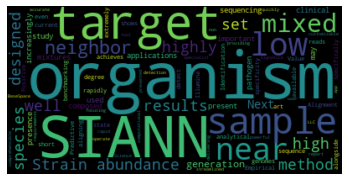

In [4]:
wordcloud = WordCloud().generate(df.abstract[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
cnt=0
for abstract in df.abstract: 
    if(type(abstract)==str):
        cnt=cnt+1
        text = "".join(abstract)
text

'Emerging and re-emerging pathogens represent a substantial threat to public health, as demonstrated with numerous outbreaks over the past years, including the 2013–2016 outbreak of Ebola virus in western Africa. Coronaviruses are also a threat for humans, as evidenced in 2002/2003 with infection by the severe acute respiratory syndrome coronavirus (SARS-CoV), which caused more than 8000 human infections with 10% fatality rate in 37 countries. Ten years later, a novel human coronavirus (Middle East respiratory syndrome coronavirus, MERS-CoV), associated with severe pneumonia, arose in the Kingdom of Saudi Arabia. Until December 2016, MERS has accounted for more than 1800 cases and 35% fatality rate. Finding an animal model of disease is key to develop vaccines or antivirals against such emerging pathogens and to understand its pathogenesis. Knowledge of the potential role of domestic livestock and other animal species in the transmission of pathogens is of importance to understand the 

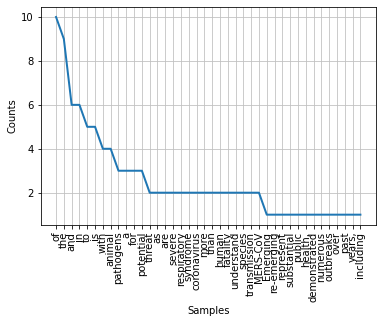

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
tokenizer = RegexpTokenizer('\s', gaps = True)
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(40)

In [7]:
print(type(tokens))
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()

<class 'list'>


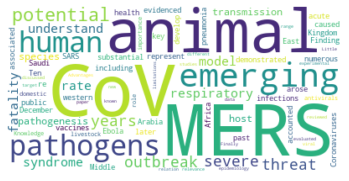

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["case", "virus", "nCoV", "infection", "countries", "disease", "coronavirus", "epidemic", "cases", "novel", "COVID"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
covidmask = np.array(Image.open("COVIDMasks.png"))
covidmask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

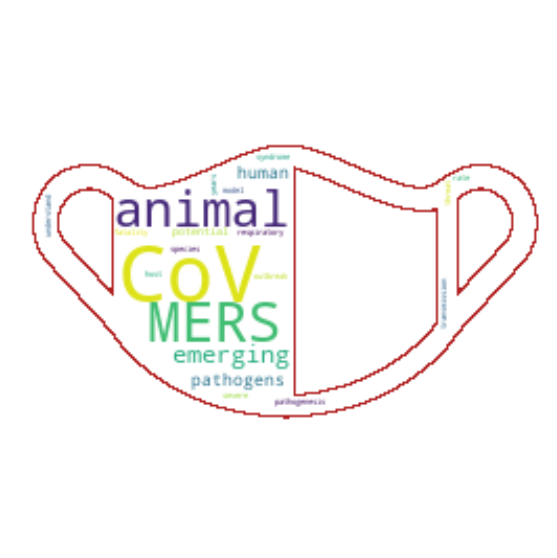

In [10]:
wc = WordCloud(background_color="white", max_words=1000, mask=covidmask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
#wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()